In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
"/content/drive/MyDrive/dataset/"
"├── class1/"
print("""
│   ├── image1.jpg
│   ├── image2.jpg
│   └── ...
└── class2/
    ├── image1.jpg

    ├── image2.jpg
    └── ...
    """)



│   ├── image1.jpg
│   ├── image2.jpg
│   └── ...
└── class2/
    ├── image1.jpg

    ├── image2.jpg
    └── ...
    


In [ ]:
from keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator class
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/train', target_size=(224, 224), batch_size=32, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/test', target_size=(224, 224), batch_size=32, class_mode='categorical')


Found 562 images belonging to 2 classes.
Found 365 images belonging to 2 classes.


In [ ]:
import os

def list_files(directory):
    for dirpath, dirnames, filenames in os.walk(directory):
        print(f'Found directory: {dirpath}')
        for file_name in filenames:
            print(file_name)

print("Training directory contents:")
list_files("/content/drive/MyDrive/dataset/train")

print("Validation directory contents:")
list_files("/content/drive/MyDrive/dataset/test")


Training directory contents:
Found directory: /content/drive/MyDrive/dataset/train
Found directory: /content/drive/MyDrive/dataset/train/dog
dog.5.jpg
dog.4.jpg
dog.14.jpg
dog.12.jpg
dog.11.jpg
dog.9.jpg
dog.10.jpg
_DS_Store
dog.3.jpg
dog.13.jpg
dog.7.jpg
dog.2.jpg
dog.8.jpg
dog.1.jpg
dog.6.jpg
dog.21.jpg
dog.24.jpg
dog.25.jpg
dog.16.jpg
dog.28.jpg
dog.19.jpg
dog.27.jpg
dog.18.jpg
dog.22.jpg
dog.23.jpg
dog.20.jpg
dog.17.jpg
dog.29.jpg
dog.26.jpg
dog.15.jpg
dog.44.jpg
dog.36.jpg
dog.38.jpg
dog.43.jpg
dog.39.jpg
dog.42.jpg
dog.34.jpg
dog.32.jpg
dog.33.jpg
dog.37.jpg
dog.30.jpg
dog.31.jpg
dog.40.jpg
dog.35.jpg
dog.41.jpg
dog.56.jpg
dog.48.jpg
dog.51.jpg
dog.50.jpg
dog.60.jpg
dog.57.jpg
dog.52.jpg
dog.59.jpg
dog.54.jpg
dog.45.jpg
dog.49.jpg
dog.58.jpg
dog.47.jpg
dog.53.jpg
dog.46.jpg
dog.55.jpg
dog.67.jpg
dog.69.jpg
dog.65.jpg
dog.70.jpg
dog.63.jpg
dog.71.jpg
dog.61.jpg
dog.74.jpg
dog.72.jpg
dog.73.jpg
dog.68.jpg
dog.75.jpg
dog.62.jpg
dog.66.jpg
dog.64.jpg
dog.89.jpg
dog.84(1).jpg
dog.79.j

In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
18/18 [==============================] - 298s 17s/step - loss: 2.8525 - accuracy: 0.6174 - val_loss: 0.5007 - val_accuracy: 0.8411
Epoch 2/10
18/18 [==============================] - 12s 645ms/step - loss: 0.6912 - accuracy: 0.8132 - val_loss: 0.5485 - val_accuracy: 0.8274
Epoch 3/10
18/18 [==============================] - 11s 642ms/step - loss: 0.3554 - accuracy: 0.8648 - val_loss: 0.3385 - val_accuracy: 0.8712
Epoch 4/10
18/18 [==============================] - 11s 611ms/step - loss: 0.2284 - accuracy: 0.9093 - val_loss: 0.3516 - val_accuracy: 0.8575
Epoch 5/10
18/18 [==============================] - 10s 569ms/step - loss: 0.1691 - accuracy: 0.9395 - val_loss: 0.3539 - val_accuracy: 0.8795
Epoch 6/10
18/18 [==============================] - 11s 623ms/step - loss: 0.1335 - accuracy: 0.9484 - val_loss: 0.3259 - val_accuracy: 0.8795
Epoch 7/10
18/18 [==============================] - 12s 648ms/step - loss: 0.1742 - accuracy: 0.9288 - val_loss: 0.3590 - val_accuracy: 0.8603


In [ ]:
for layer in base_model.layers[:15]:
    layer.trainable = False
for layer in base_model.layers[15:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
18/18 [==============================] - 15s 612ms/step - loss: 0.3567 - accuracy: 0.8523 - val_loss: 0.3436 - val_accuracy: 0.8575
Epoch 2/10
18/18 [==============================] - 12s 656ms/step - loss: 0.1274 - accuracy: 0.9448 - val_loss: 0.3439 - val_accuracy: 0.8822
Epoch 3/10
18/18 [==============================] - 11s 596ms/step - loss: 0.0393 - accuracy: 0.9840 - val_loss: 0.3743 - val_accuracy: 0.9096
Epoch 4/10
18/18 [==============================] - 12s 651ms/step - loss: 0.0419 - accuracy: 0.9804 - val_loss: 0.4454 - val_accuracy: 0.9068
Epoch 5/10
18/18 [==============================] - 11s 629ms/step - loss: 0.0747 - accuracy: 0.9751 - val_loss: 0.2858 - val_accuracy: 0.8932
Epoch 6/10
18/18 [==============================] - 12s 658ms/step - loss: 0.0718 - accuracy: 0.9733 - val_loss: 0.3484 - val_accuracy: 0.9041
Epoch 7/10
18/18 [==============================] - 12s 645ms/step - loss: 0.0309 - accuracy: 0.9893 - val_loss: 0.3979 - val_accuracy: 0.9123

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


12/12 [==============================] - 2s 153ms/step - loss: 0.3514 - accuracy: 0.9041
Validation Accuracy: 90.41%


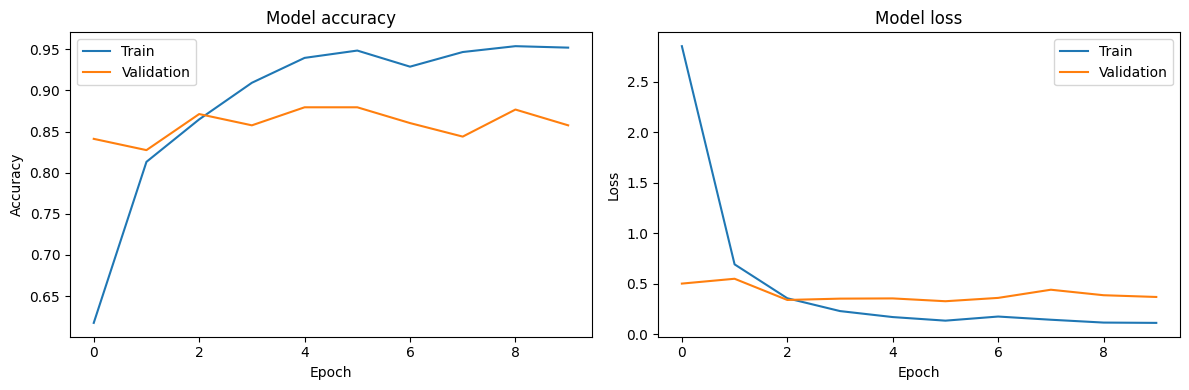

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

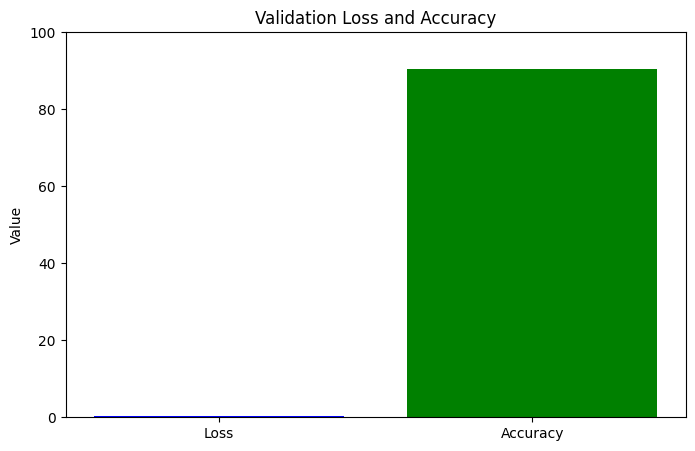

In [ ]:
metrics = ['Loss', 'Accuracy']
values = [loss, accuracy * 100]
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green'])
plt.ylim(0, 100)  # Set y-axis limit to 100 for better accuracy visualization
plt.ylabel('Value')
plt.title('Validation Loss and Accuracy')
plt.show()

In [ ]:
# Save the model in TensorFlow SavedModel format
model.save('/content/drive/MyDrive/mymodel')


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to preprocess the image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)  # Load the image and resize to the target size
    img_array = image.img_to_array(img)  # Convert the image to an array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model's input shape
    img_array = img_array / 255.0  # Normalize the image array (assuming the model was trained on normalized images)
    return img_array

# Function to make a prediction
def predict_image(model, img_array):
    prediction = model.predict(img_array)  # Get the model's prediction
    return prediction

# Function to interpret the prediction
def interpret_prediction(prediction):
    class_indices = {0: 'cat', 1: 'dog'}  # Map the indices to class labels
    predicted_class_index = np.argmax(prediction, axis=1)[0]  # Get the index of the highest probability
    predicted_class_label = class_indices[predicted_class_index]  # Get the corresponding class label
    return predicted_class_label

# Load the trained model
model_path = '/content/drive/MyDrive/mymodel'  # Replace with your model's file path
model = load_model(model_path)

# Function to predict and interpret an image
def predict_cat_or_dog(img_path):
    img_array = preprocess_image(img_path)  # Preprocess the image
    prediction = predict_image(model, img_array)  # Get the prediction
    predicted_class_label = interpret_prediction(prediction)  # Interpret the prediction
    return predicted_class_label

# Example usage
img_path = '/content/drive/MyDrive/dataset/test/cats/cat.4006.jpg'  # Replace with your image file path
result = predict_cat_or_dog(img_path)
print(f'The image is a: {result}')


1/1 [==============================] - 0s 144ms/step
The image is a: cat
